In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import gamma

ModuleNotFoundError: No module named 'numpy'

In [3]:
# Часть 1. Генерация выборок
N = [10, 50, 1000]

# Выборка для нормального распределения N(x, μ, σ)
mu_normal, s_normal = 0.0, 1.0
sample_normal = [np.random.normal(mu_normal, s_normal, n) for n in N]
# Выборка для распределения Коши C(x, x_0, γ)
mu_cauchy, s_cauchy = 0.0, 1.0 
sample_cauchy = [mu_cauchy + s_cauchy * np.random.standard_cauchy(n) for n in N]
# Выборка для распределения Стьюдента t(x, μ, σ) с тремя степенями свободы
sample_student = [np.random.standard_t(3, n) for n in N]
# Выборка для распределения Пауссона P(k, μ)
mu_poisson = 10.0
sample_poisson = [np.random.poisson(mu_poisson, n) for n in N]
# Выборка для равномерного распределения U(x, a, b)
a_uniform, b_uniform = -np.sqrt(3), np.sqrt(3)
sample_uniform = [np.random.uniform(a_uniform, b_uniform, n) for n in N]

# Функции плотности: 
def p_normal(x, mu = mu_normal, s = s_normal):
   return (1.0 / (s * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) ** 2) / (s ** 2))

def p_cauchy(x, mu = mu_cauchy, s = s_cauchy):
   return (1.0 / np.pi) * (s / ((x - mu) ** 2 + s**2))

def p_student(x, t = 3.0):
   return (gamma((t + 1.0) / 2.0) / (np.sqrt(t * np.pi) * gamma(t / 2.0))) * ((1.0 + (x ** 2) / t)**(- (t + 1.0) / 2.0))

def p_poisson(x, mu = mu_poisson):
   return (mu ** x) * np.exp(-mu) / gamma(x + 1)

def p_uniform(x, a = a_uniform, b = b_uniform):
   return (1.0 / (b - a)) if (x >= a) and (x <= b) else 0.0

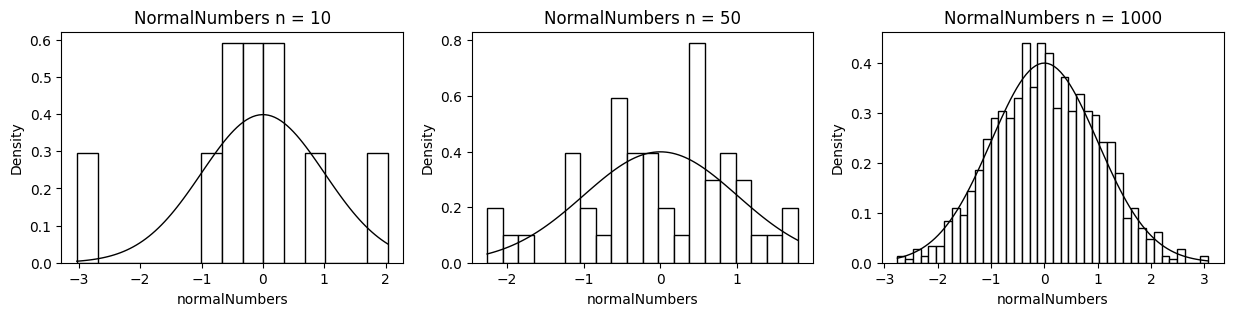

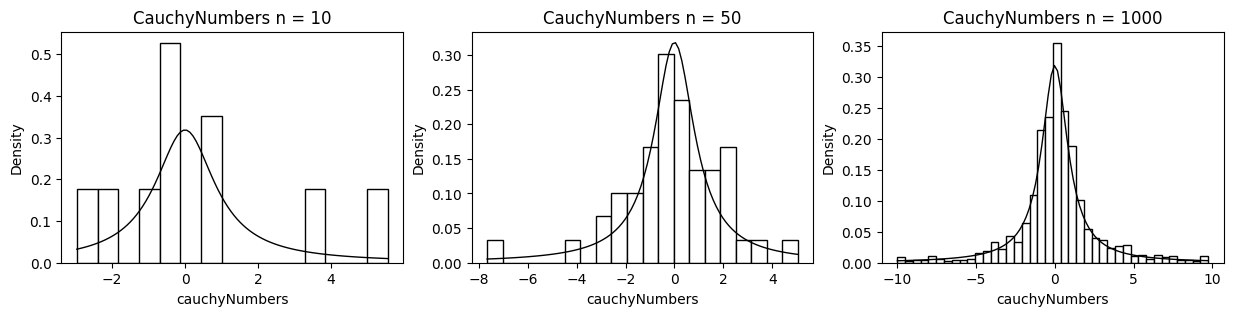

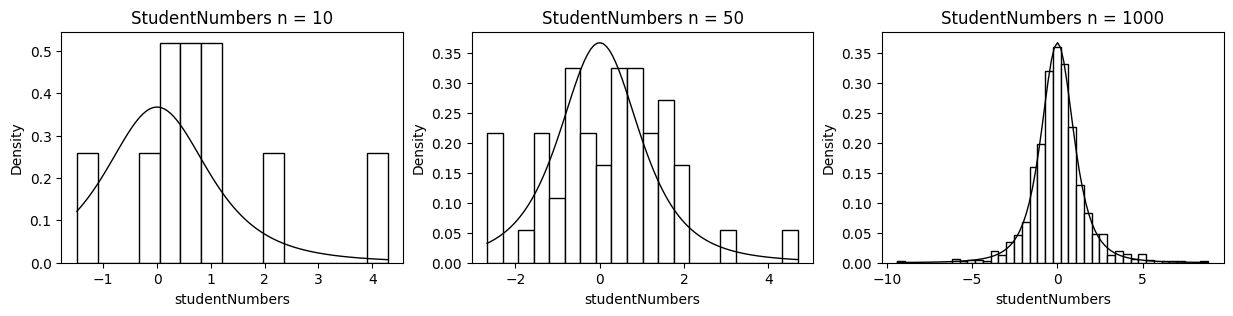

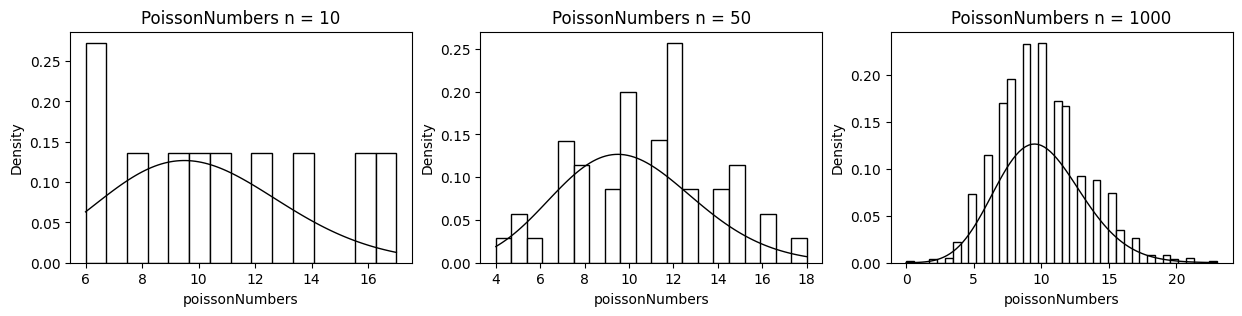

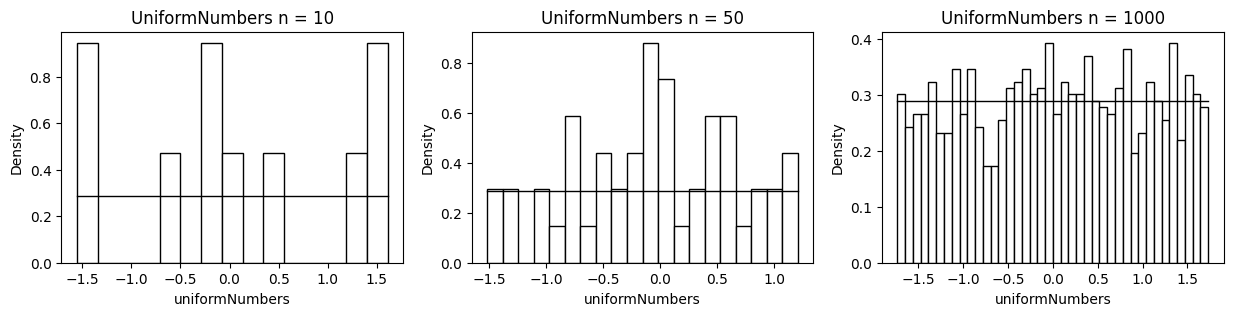

In [4]:
# Часть 2. Построение графиков
bins = [15, 20, 40]
samples = [
  sample_normal, 
  [sample_cauchy[i][(np.abs(sample_cauchy[i]) <= 10)] for i in range(len(sample_cauchy))],
  [sample_student[i][(np.abs(sample_student[i]) <= 10)] for i in range(len(sample_student))],
  sample_poisson,
  sample_uniform
]
denstinys = [p_normal, p_cauchy, p_student, p_poisson, p_uniform]

names = ['NormalNumbers', 'CauchyNumbers', 'StudentNumbers', 'PoissonNumbers', 'UniformNumbers']
xnames = ['normalNumbers', 'cauchyNumbers', 'studentNumbers', 'poissonNumbers', 'uniformNumbers']

for j in range(len(samples)):
  plt.figure(figsize = (15, 3))
  for i in range(len(N)):
    plt.subplot(100 + len(N) * 10 + i + 1)
    x_min = min(samples[j][i])
    x_max = max(samples[j][i])
    x = np.linspace(x_min, x_max, 100)
    y = [denstinys[j](xi) for xi in x]
    plt.hist(samples[j][i], bins=bins[i], density=True, color='white', edgecolor='black')
    plt.plot(x, y, color='black', linewidth=1)
    plt.title(f'{names[j]} n = {N[i]}')
    plt.xlabel(xnames[j])
    plt.ylabel('Density')
  plt.show()